# The Maximal Coverage Location Problem (MCLP)

Maximum Coverage Location Problems (MCLP) was proposed by Church and ReVelle<sup>[1]</sup>. 

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Problem-Description" data-toc-modified-id="Problem-Description-1">Problem Description</a></span><ul class="toc-item"><li><span><a href="#MCLP" data-toc-modified-id="MCLP-1.1">MCLP</a></span></li><li><span><a href="#Integer-programming-model:" data-toc-modified-id="Integer-programming-model:-1.2">Integer programming model:</a></span></li></ul></li><li><span><a href="#Setup" data-toc-modified-id="Setup-2">Setup</a></span><ul class="toc-item"><li><span><a href="#Set-up-the-environment-by-importing-libraries" data-toc-modified-id="Set-up-the-environment-by-importing-libraries-2.1">Set up the environment by importing libraries</a></span></li></ul></li><li><span><a href="#Example" data-toc-modified-id="Example-3">Example</a></span><ul class="toc-item"><li><span><a href="#Case1.-Solving-MCLP-(Maximum-Coverage-Location-Problems)-with-synthetic-data" data-toc-modified-id="Case1.-Solving-MCLP-(Maximum-Coverage-Location-Problems)-with-synthetic-data-3.1">Case1. Solving MCLP (Maximum Coverage Location Problems) with synthetic data</a></span></li><li><span><a href="#Case2.-Solving-MCLP-(Maximum-Coverage-Location-Problems)-with-real-world-data" data-toc-modified-id="Case2.-Solving-MCLP-(Maximum-Coverage-Location-Problems)-with-real-world-data-3.2">Case2. Solving MCLP (Maximum Coverage Location Problems) with real-world data</a></span></li></ul></li></ul></div>

## Problem Description

### MCLP

It is assumed that there is a transportation network that is given along with the location of demand points and facilities. Therefore, for each demand point $i$, it should be given a coverage radius $R_i$ so that demand point $i$ can be served by a facility currently located within a distance of demand point $i$. Hence, from this perspective, the objective of MCLP is to **cover the most demand points under the condition that the number and radius of facilities are known**.

*Parameters*:
* **$I={1,...,n}$** : Set of demand points
* **$J={1,...,m}$** : Set of potential facility sites
* **$S$** : Maximal acceptable service distance or time standard
* **$d_{ij}$** : Shortest distance or travel time between nodes $i$ and point $j$
* **$N_i$** : { *j* | *$d_{ij}$* < $S$ }
* **$p$** : Number of facilities to be located


*Decision variables*:
$$\begin{array}{lll}
X_i= \begin{cases}1, & \text { if demand } i \text { is covered within a service standard }\\ 0, & \text { else }\end{cases}\\
Y_{j}= \begin{cases}1, & \text { if a facility is located at node } j \\ 0, & \text { else }\end{cases}
\end{array}
$$

###  Integer programming model:
$$
\begin{array}{lll}
\text{max} & \sum _{i=1}^{n}{a_iX_i} & (1) \\
\text{s.t.} & \sum_{j\in N_i}{Y_j \geq X_i}  \forall i & (2) \\
& \sum_{j}{Y_j = p}  \forall j & (3) \\
& X_i \in \{0,1\}  \forall i & (4) \\
& Y_j \in \{0,1\}  \forall j & (5) \\
\end{array}
$$

* The objective (1) maximize the amount of demand covered within a maximal service distance or time standard by locating a fixed number of facilities.
* The constraint (2) indicates that demand point $i$ can only be covered by deploying facilities at point $j$ first.
* The constraint (3) determine the number of facilities deployed.
* The constraints (4) and (5) limit the decision variables $x_j$ and $y_i$ to be binary variables of 0,1.

[1] Church R, ReVelle C. The maximal covering location problem[C]//Papers of the regional science association. Berlin/Heidelberg: Springer-Verlag, 1974, 32(1): 101-118.

## Setup

### Set up the environment by importing libraries
import numpy, pulp, matplotlib and Hispot libraries to set up an environment

In [4]:
import random
import numpy as np
from pulp import *
import matplotlib.pyplot as plt
from hispot.coverage import MCLP

PuLP is an open source linear programming package (actually also includes integer programming). You can use `pip install pulp` to start. 

PuLP supports many open source linear programming solvers, such as `CBC` and `GLPK`; in addition, it also supports commercial solvers such as `Gurobi` and IBM's `CPLEX`.
The default is CBC, and PuLP will be installed by default. For most problems, the CBC open source solver from COIN-OR will suffice.
You can use `listSolvers(onlyAvailable=True)` to check the available solvers.

In [5]:
np.random.seed(0) # random seed
solver_list = listSolvers(onlyAvailable=True)
print(solver_list)  

Restricted license - for non-production use only - expires 2026-11-23
['GUROBI', 'GUROBI_CMD', 'PULP_CBC_CMD', 'COIN_CMD']


## Example

In this part, we will input synthetic data and real-world data and display them as two examples to represent random cases and real-world scenarios, respectively.

### Case1. Solving MCLP (Maximum Coverage Location Problems) with synthetic data

Generate problem with synthetic data

In [6]:
n_points =50
p = 8
radius = 0.2
num_people = np.random.randint(1, 2, size=n_points)
points = [(random.random(), random.random()) for i in range(n_points)]
points_np = np.array(points)

Output optimal solution

In [7]:
%%time
centers, obj = MCLP(num_points=n_points,
                    num_located=p,
                    num_people=num_people,
                    points=points_np,
                    radius=radius,
                    solver=PULP_CBC_CMD()).prob_solve()

Status: Optimal
Selected points = [3, 4, 6, 18, 23, 25, 36, 48]
The coverage radius = 0.2
Minimum cost = 49.0
CPU times: total: 31.2 ms
Wall time: 48.2 ms


Visualize optimal solution

In [8]:
from matplotlib.patches import Circle
def display_points_with_mclp(data,solution, radius):
    ax = plt.gca()
    plt.xlim(-0.3, 1.2)
    plt.ylim(-0.2, 1.3)
    plt.scatter(data[:, 0], data[:, 1], c='blue', label='Demand Points')
    for i in solution:
        plt.scatter(data[i][0], data[i][1], c='red', marker='*', s=100)
        circle = Circle(xy=(data[i][0], data[i][1]), radius=radius, color='black', fill=False, lw=1)
        ax.add_artist(circle)
    plt.scatter(data[i][0], data[i][1], c='red', marker='*', s=100, label='Centers')

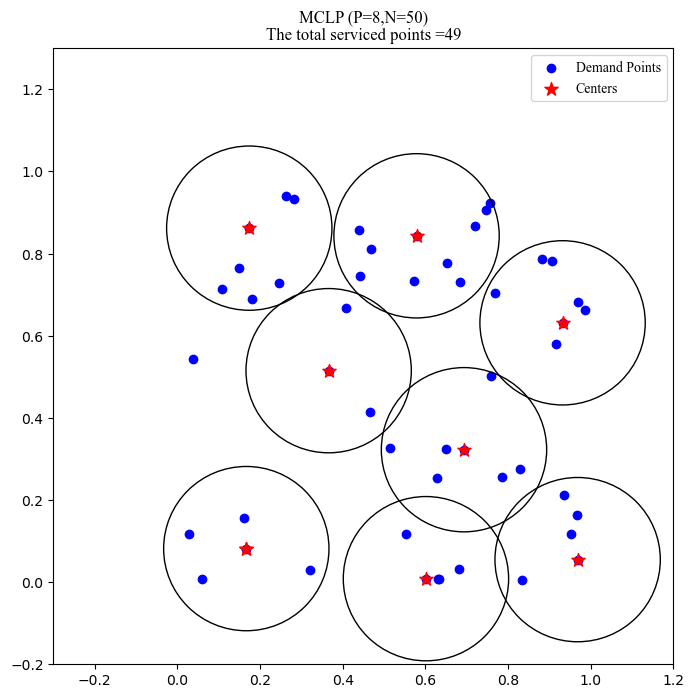

In [9]:
fig = plt.figure(figsize=(8, 8))
name = 'MCLP (P=' + str(p) + ',N=' + str(n_points) + ')\nThe total serviced points =' + str(round(obj))
plt.title(name, font = 'Times New Roman', fontsize = 12)
display_points_with_mclp(points_np, centers, radius)
plt.legend(loc='best', prop = 'Times New Roman', fontsize = 12) 
plt.show()

### Case2. Solving MCLP (Maximum Coverage Location Problems) with real-world data

import `geopandas`, `geoplot` to plot the real world map.

In [10]:
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
import numpy as np
import matplotlib.pyplot as plt

We select Daxing District of Beijing the study area and read partial poi points in Daxing District.

In [11]:
%%time
region=gpd.read_file("../data/shenzhen/坪山区.shp")
region.head(2)

CPU times: total: 31.2 ms
Wall time: 32 ms


,id,name,site,Shape_Leng,Shape_Area,geometry
0,440310,坪山区,www.poi86.com,0.742967,0.014409,"POLYGON ((114.35085 22.76847, 114.35104 22.767..."


Partial POI data in Daxing district

In [12]:
%%time
poi = gpd.read_file("../data/shenzhen/坪山区AED.shp")
poi.shape[0]

CPU times: total: 0 ns
Wall time: 10 ms


494

In [13]:
def render_north_arrow(ax, x, y, size, ratio = 1):
    path = [(0, 1), (-ratio, -1), (0, -0.5), (ratio, -1), (0, 1)]
    path = [(i[0] * size + x, i[1] * size + y) for i in path]
    arrow = plt.Polygon(path, color='black', transform=ax.transAxes)
    ax.add_patch(arrow)
    ax.text(x, y-size*2, s = 'N', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

Visualization of the input data by geoplot

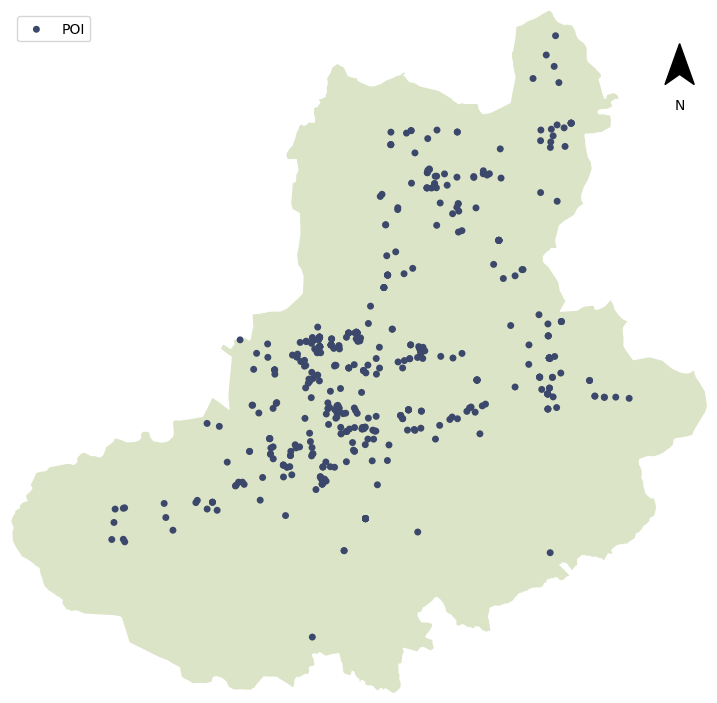

In [14]:
ax = gplt.polyplot(region,
                   projection=gcrs.AlbersEqualArea(),
                   edgecolor="white", facecolor="#DBE4C6",
                   figsize=(9, 9))
gplt.pointplot(poi, 
               extent=region.total_bounds,
               s=5,
               color='#3C486B',
               alpha=1,
               linewidth=0,
               label='POI',
               ax=ax)
plt.legend(loc='upper left')
render_north_arrow(ax = ax, x = 0.96, y = 0.92, size = 0.03,ratio = 0.7)

Generate problem with real-world data

In [15]:
data = poi[['lon', 'lat']]
num_points = poi.shape[0]
num_located = 50
num_people = np.random.randint(1, 2, size=num_points)
points = [(data['lon'][i], data['lat'][i]) for i in range(num_points)]
points_np = np.array(points)
radius = 0.005

Output optimal solution

In [16]:
centers, obj = MCLP(num_points=num_points,
                    num_located=num_located,
                    num_people=num_people,
                    points=points_np,
                    radius=radius,
                    solver=PULP_CBC_CMD()).prob_solve()

Status: Optimal
Selected points = [1, 7, 14, 23, 24, 28, 33, 43, 65, 66, 88, 90, 104, 111, 137, 150, 151, 225, 226, 243, 282, 284, 300, 302, 303, 322, 336, 340, 342, 346, 355, 371, 372, 380, 392, 393, 394, 397, 419, 430, 431, 453, 455, 456, 465, 471, 472, 477, 483, 492]
The coverage radius = 0.005
Minimum cost = 469.0


In [17]:
center_points = poi.iloc[centers]

In [18]:
center_points

,index,lon,lat,geometry
1,3,114.288726,22.664587,POINT (114.28873 22.66459)
7,12,114.301987,22.665747,POINT (114.30199 22.66575)
14,19,114.313904,22.669304,POINT (114.3139 22.6693)
23,41,114.315658,22.686962,POINT (114.31566 22.68696)
24,45,114.322010,22.673469,POINT (114.32201 22.67347)
28,12,114.323394,22.681139,POINT (114.32339 22.68114)
33,180,114.329446,22.679410,POINT (114.32945 22.67941)
43,38,114.325760,22.690071,POINT (114.32576 22.69007)
65,77,114.347569,22.658033,POINT (114.34757 22.65803)
66,79,114.328060,22.703022,POINT (114.32806 22.70302)


In [19]:
from shapely.geometry.polygon import Polygon
def gen_circile_gdf(centers, radius, num_segments = 100):
    crs = 'EPSG:3857'
    Circles = gpd.GeoDataFrame(columns=['id', 'geometry'], crs=crs)
    k=0
    for center in centers:
        angles = [i * (360 / num_segments) for i in range(num_segments)]
        points = [(center[0] + radius * np.cos(np.radians(a)), center[1] + radius * np.sin(np.radians(a))) for a in angles]
        circle = Polygon(points)
        Circles.loc[k] = [k+1, circle]
        k = k+1
    return Circles

In [20]:
coverage = gen_circile_gdf(points_np[centers], radius)

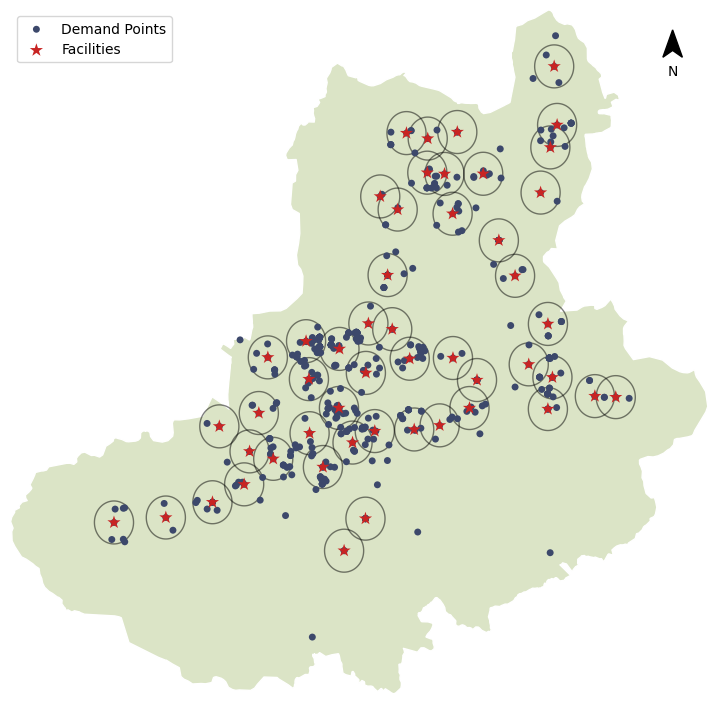

In [21]:
ax = gplt.polyplot(region,
                   projection=gcrs.AlbersEqualArea(),
                   edgecolor="white", facecolor="#DBE4C6",
                   figsize=(9, 9))
gplt.polyplot(coverage,
              projection=gcrs.AlbersEqualArea(),
              edgecolor="black", 
              alpha=0.5,
              zorder=1,
              ax=ax)

gplt.pointplot(poi, 
               extent=region.total_bounds,
               s=5,
               color='#3C486B',
               alpha=1,
               linewidth=0,
               label='Demand Points',
               zorder=2,
               ax=ax)
gplt.pointplot(center_points, 
               extent=region.total_bounds,
               s=10,
               color='#C82423',
               alpha=1,
               linewidth=0,
               marker='*',
               label='Facilities',
               zorder=4,
               ax=ax)
render_north_arrow(ax = ax, x = 0.95, y = 0.95, size = 0.02,ratio = 0.7)
plt.legend(loc='upper left')


In [22]:
import math

def render_scale_bar(ax, x=0.05, y=0.05, length_frac=0.25, segments=2,
                     color='black', unit='m', fontsize=9, approx_lat=None, 
                     fixed_max_distance=4000):
    # 计算实际比例尺长度（根据地图坐标系）
    x0, x1 = ax.get_xlim()
    y0, y1 = ax.get_ylim()
    
    # 计算每度对应的米数（如果是经纬度坐标）
    if approx_lat is not None:
        m_per_deg = 111320.0 * math.cos(math.radians(approx_lat))
        map_width_m = (x1 - x0) * m_per_deg
    else:
        # 假设是投影坐标系，直接使用坐标差值
        map_width_m = x1 - x0
    
    # 根据固定距离计算比例尺应该占的比例
    actual_length_frac = fixed_max_distance / map_width_m
    # 限制比例尺不要太长，最多占图幅的30%
    actual_length_frac = min(actual_length_frac, 0.3)
    
    # 画主线（使用计算出的实际长度比例）
    ax.plot([x, x+actual_length_frac], [y, y], transform=ax.transAxes, color=color, lw=2)

    # 使用固定的最大距离值
    total_len_m = fixed_max_distance

    # 刻度与数字
    for s in range(segments + 1):
        xs = x + actual_length_frac * s / segments
        ax.plot([xs, xs], [y-0.01, y+0.01], transform=ax.transAxes, color=color, lw=1)
        val = total_len_m * s / segments
        label = '0' if s == 0 else f'{int(val):,}'
        ax.text(xs, y-0.035, label, ha='center', va='top', transform=ax.transAxes, fontsize=fontsize)

    # 单位（放在比例尺右端，增加间距避免重合）
    ax.text(x + actual_length_frac + 0.02, y-0.035, unit, ha='left', va='top',
            transform=ax.transAxes, fontsize=fontsize)

In [73]:
# 绘制指北针
def render_north_arrow(ax, x, y, size, ratio = 1):
    # ax： matplotlib的坐标轴对象 绘制指北针
    # x, y： 指北针的左下角坐标
    # size： 指北针的大小
    # ratio： 指北针的比例 默认为1
    path = [(0, 1), (-ratio, -1), (0, -0.5), (ratio, -1), (0, 1)]
    path = [(i[0] * size + x, i[1] * size + y) for i in path]
    arrow = plt.Polygon(path, color='black', transform=ax.transAxes)
    ax.add_patch(arrow)
    ax.text(x, y-size*2.5, s = 'N', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=22, fontweight='bold')

In [75]:
import os
import seaborn as sns
from matplotlib.colors import ListedColormap
from matplotlib.lines import Line2D
from matplotlib import patheffects as pe

def plot_result_pretty(ls, opt_sites, radius_m=2000, roads_path="data/HuLaTang/Export_Output_2.shp",
                       demand_gridsize=60, demand_cmap="magma", roads_color="#9e9e9e", roads_alpha=0.35,
                       norm_mode="log", vmin_q=0.10, vmax_q=0.995, gamma=0.6, reduce="sum",
                       overlay_points=True, overlay_points_size=6, overlay_points_alpha=0.28,
                       overlay_hex_grid=False, hex_grid_color="#222222", hex_grid_alpha=0.18, hex_grid_lw=0.25,
                       circle_style="ring", show_heat=True, show_colorbar=False, lang="zh", title=None):
    """
    更美观的选址结果绘图：需求热度（hexbin）+ 道路 + 站点 + 服务圈。

    Args:
        ls (GeoDataFrame): 需求点，包含 POINT_X/POINT_Y 或 X/Y 以及 All_pop（可选）。
        opt_sites (DataFrame): 入选站点行，包含 x/y 列（point_x_1/POINT_X...）。
        radius_m (float): 服务半径（与坐标同单位）。
        roads_path (str): 道路 shp 文件路径。
        demand_gridsize (int): 六边形网格大小。
        demand_cmap (str): 需求热度配色。
        roads_color (str): 道路颜色。
        roads_alpha (float): 道路透明度。
        norm_mode (str): 'log' | 'power' | 'linear'。
        vmin_q, vmax_q (float): 需求分位裁剪，仅用于显示。
        gamma (float): PowerNorm 的 gamma。
        reduce (str): 'sum' 或 'mean' 作为 hexbin 聚合方式。
        overlay_points (bool): 是否叠加需求点散点。
        circle_style (str): 'fill' | 'ring' 服务圈样式。
        show_colorbar (bool): 是否显示色标。
        lang (str): 'zh' 或 'en'，控制标签语言。
        title (str|None): 自定义标题。
    """
    # 语言包
    L = {
        'zh': {
            'road': '道路网络', 'demand': '需求点', 'selected': '新建门店', 'current': '现有门店',
            'title': '选址结果与需求强度', 'subtitle': lambda n, r: f"门店数：{n}  半径：{r} m"
        },
        'en': {
            'road': 'Road network', 'demand': 'Demand points', 'selected': 'Selected facilities', 'current': 'Current sites',
            'title': 'Optimized Facilities with Demand Heat', 'subtitle': lambda n, r: f"Facilities: {n}  Radius: {r} m"
        }
    }
    LL = L.get(lang, L['zh'])

    # 1) 需求列与坐标列
    pop_col = None
    if 'speed_pct_freeflow_rev' in ls.columns:
        pop_col = 'speed_pct_freeflow_rev'
    else:
        for c in ls.columns:
            if str(c).lower() == 'all_pop':
                pop_col = c
                break

    # 支持多种坐标列命名：X/Y、POINT_X/POINT_Y、x/y、lon/lat、lng/latitude 等
    def pick_xy_from_ls(df):
        lower_to_orig = {str(c).lower(): c for c in df.columns}
        def choose(candidates):
            for name in candidates:
                if name in lower_to_orig:
                    return lower_to_orig[name]
            return None
        x_col = choose(['x', 'point_x', 'pointx', 'lon', 'lng', 'longitude', 'point_x_1', 'point_x'])
        y_col = choose(['y', 'point_y', 'pointy', 'lat', 'latitude', 'point_y_1', 'point_y'])
        if x_col is None and 'POINT_X' in df.columns:
            x_col = 'POINT_X'
        if y_col is None and 'POINT_Y' in df.columns:
            y_col = 'POINT_Y'
        if x_col is None and 'X' in df.columns:
            x_col = 'X'
        if y_col is None and 'Y' in df.columns:
            y_col = 'Y'
        if x_col is None or y_col is None:
            raise ValueError("ls must contain coordinate columns (X/Y, POINT_X/POINT_Y, or lon/lat).")
        return x_col, y_col

    dx, dy = pick_xy_from_ls(ls)

    # 2) 站点坐标列
    def pick_xy_cols(df):
        x_col = None
        y_col = None
        # 支持更多坐标命名：x/y、X/Y、POINT_X/POINT_Y、lon/lat、lng/latitude
        lower_to_orig = {str(c).lower(): c for c in df.columns}
        def choose(candidates):
            for name in candidates:
                if name in lower_to_orig:
                    return lower_to_orig[name]
            return None
        x_col = choose(['x', 'point_x', 'pointx', 'lon', 'lng', 'longitude', 'point_x_1', 'point_x'])
        y_col = choose(['y', 'point_y', 'pointy', 'lat', 'latitude', 'point_y_1', 'point_y'])
        if x_col is None and 'POINT_X' in df.columns: x_col = 'POINT_X'
        if y_col is None and 'POINT_Y' in df.columns: y_col = 'POINT_Y'
        if x_col is None and 'X' in df.columns: x_col = 'X'
        if y_col is None and 'Y' in df.columns: y_col = 'Y'
        if x_col is None or y_col is None:
            raise ValueError('opt_sites must contain coordinate columns (X/Y, POINT_X/POINT_Y, or lon/lat).')
        return x_col, y_col

    x_col, y_col = pick_xy_cols(opt_sites)

    # 3) 画布
    fig, ax = plt.subplots(figsize=(20, 16))

    # 4) 道路底图
    if isinstance(roads_path, str) and os.path.exists(roads_path):
        try:
            roads = gpd.read_file(roads_path)
            try:
                roads.plot(ax=ax, color=roads_color, linewidth=0.4, alpha=roads_alpha, zorder=1, label=LL['road'])
            except Exception:
                pass
        except Exception:
            pass

    # 5) 需求热度（hexbin），分位裁剪 + 归一
    try:
        if show_heat:
            values = ls[pop_col].to_numpy() if pop_col is not None else None
            if values is not None:
                vmin = float(np.quantile(values, vmin_q)) if 0 <= vmin_q < 1 else None
                vmax = float(np.quantile(values, vmax_q)) if 0 < vmax_q <= 1 else None
                if vmin is not None and vmax is not None and vmax > vmin:
                    values_clipped = np.clip(values, vmin, vmax)
                else:
                    values_clipped = values
                if norm_mode == 'log':
                    from matplotlib.colors import LogNorm
                    norm = LogNorm(vmin=max(values_clipped.min(), 1e-6), vmax=values_clipped.max())
                elif norm_mode == 'power':
                    from matplotlib.colors import PowerNorm
                    norm = PowerNorm(gamma=gamma, vmin=values_clipped.min(), vmax=values_clipped.max())
                else:
                    norm = None
            else:
                values_clipped = None
                norm = None

            reducer = np.sum if reduce == 'sum' else np.mean
            hb = ax.hexbin(ls[dx].to_numpy(), ls[dy].to_numpy(),
                           C=values_clipped,
                           reduce_C_function=reducer if values_clipped is not None else None,
                           gridsize=demand_gridsize, cmap=demand_cmap, bins=None, mincnt=1,
                           linewidths=0, alpha=0.92, zorder=5, norm=norm)
            try:
                hb.set_edgecolor('face')
            except Exception:
                pass
            if show_colorbar and values is not None:
                cbar = fig.colorbar(hb, ax=ax, shrink=0.8)
                cbar.ax.tick_params(labelsize=10)
    except Exception:
        if show_heat:
            sc = ax.scatter(ls[dx], ls[dy], c=ls[pop_col] if pop_col is not None else '#9ecae1',
                            s=8, cmap=demand_cmap, edgecolors='none', zorder=5)
            if show_colorbar and pop_col is not None:
                fig.colorbar(sc, ax=ax, shrink=0.8)

    # 6) 可选叠加：需求点
    if overlay_points:
        try:
            ax.scatter(ls[dx], ls[dy], s=overlay_points_size, c='#2c3e50', alpha=overlay_points_alpha,
                       linewidths=0, zorder=6, label=LL['demand'])
        except Exception:
            pass

    # 7) 门店与服务圈
    legend_flag = {'selected': False, 'current': False}
    for _, row in opt_sites.iterrows():
        cx = float(row[x_col])
        cy = float(row[y_col])
        is_current = ('current' in opt_sites.columns and bool(row['current']) is True)
        if is_current:
            coll = ax.scatter(cx, cy, s=46, marker='o', facecolor='white', edgecolor='red', linewidths=1.2,
                              zorder=10, label=LL['current'] if not legend_flag['current'] else None)
            try:
                coll.set_path_effects([pe.withStroke(linewidth=2.2, foreground='white')])
            except Exception:
                pass
            legend_flag['current'] = True
            circ_kwargs = dict(facecolor='none', edgecolor='red', lw=1.0, alpha=0.9, zorder=9)
            if circle_style == 'fill':
                circ_kwargs.update(facecolor='none')
            ax.add_artist(plt.Circle((cx, cy), radius_m, **circ_kwargs))
        else:
            coll = ax.scatter(cx, cy, s=52, marker='o', facecolor='#FF8C42', edgecolor='white', linewidths=0.8,
                              zorder=11, label=LL['selected'] if not legend_flag['selected'] else None)
            try:
                coll.set_path_effects([pe.withStroke(linewidth=2.0, foreground='white')])
            except Exception:
                pass
            legend_flag['selected'] = True
            if circle_style == 'fill':
                circ = plt.Circle((cx, cy), radius_m, facecolor='#FF8C42', edgecolor='#FF8C42', lw=0.6, alpha=0.12, zorder=8)
            else:
                circ = plt.Circle((cx, cy), radius_m, facecolor='none', edgecolor='#FF8C42', lw=1.2, ls='--', alpha=0.85, zorder=9)
            ax.add_artist(circ)

    # 8) 外观
    ax.axis('scaled')
    ax.tick_params(axis='both', left=False, top=False, right=False,
                   bottom=False, labelleft=False, labeltop=False,
                   labelright=False, labelbottom=False)
    ax.grid(False)
    for spine in ax.spines.values():
        spine.set_visible(True)
        spine.set_linewidth(1.0)
        spine.set_edgecolor('#333333')
    ax.margins(x=0.02, y=0.02)

    ttl = title if title is not None else LL['title']
    ax.set_title(ttl + "\n" + LL['subtitle'](len(opt_sites), int(radius_m)), fontsize=18, pad=12)
    try:
        #render_scale_bar(ax=ax, x=0.05, y=0.05)
        #render_scale_bar(ax, x=0.05, y=0.95, length_frac=0.25, segments=2,
                 #color='black', unit='m', fontsize=9, approx_lat=approx_lat, 
                 #fixed_max_distance=4000)
        render_north_arrow(ax=ax, x=0.95, y=0.95, size=0.03, ratio=0.7)
    except Exception:
        pass

    # 9) 图例（统一“Selected facilities / Demand points”大小）
    legend_marker_size = 22         # 放大图例里圆点
    legend_fontsize = 14            # 放大字体
    legend_frame_lw = 2.0           # 框线粗细 
    legend_frame_ec = '#333333'     # 框线颜色
    legend_borderpad = 0.9          # 框与内容的内边距
    legend_labelspacing = 0.8       # 行距
    legend_handlelength = 1.6       # 句柄长度
    legend_handletextpad = 0.8      # 句柄与文字间距
    has_current = ('current' in opt_sites.columns and bool(np.any(opt_sites['current'].astype(bool))))
    custom_handles = []
    # road
    #custom_handles.append(Line2D([0], [0], color=roads_color, lw=1.0, alpha=0.6, label=LL['road']))
    # current (optional)
    if has_current:
        custom_handles.append(Line2D([0], [0], marker='o', color='none', markerfacecolor='white',
                                    markeredgecolor='red', markeredgewidth=1.2, markersize=legend_marker_size,
                                     label=LL['current']))
    # demand
    if overlay_points:
        custom_handles.append(Line2D([0], [0], marker='o', color='none', markerfacecolor='#2c3e50',
                                     markersize=legend_marker_size, alpha=overlay_points_alpha, label=LL['demand']))
    # selected
    if len(opt_sites) > 0:
        custom_handles.append(Line2D([0], [0], marker='o', color='none', markerfacecolor='#FF8C42',
                                     markeredgecolor='white', markeredgewidth=0.8, markersize=legend_marker_size,
                                     label=LL['selected']))
    leg = ax.legend(handles=custom_handles, loc='lower right', markerscale=1.0, frameon=True, framealpha=0.85, fontsize=20)

    # 强化框线 
    leg.get_frame().set_linewidth(legend_frame_lw)
    leg.get_frame().set_edgecolor(legend_frame_ec)

    fig.tight_layout()
    return ax


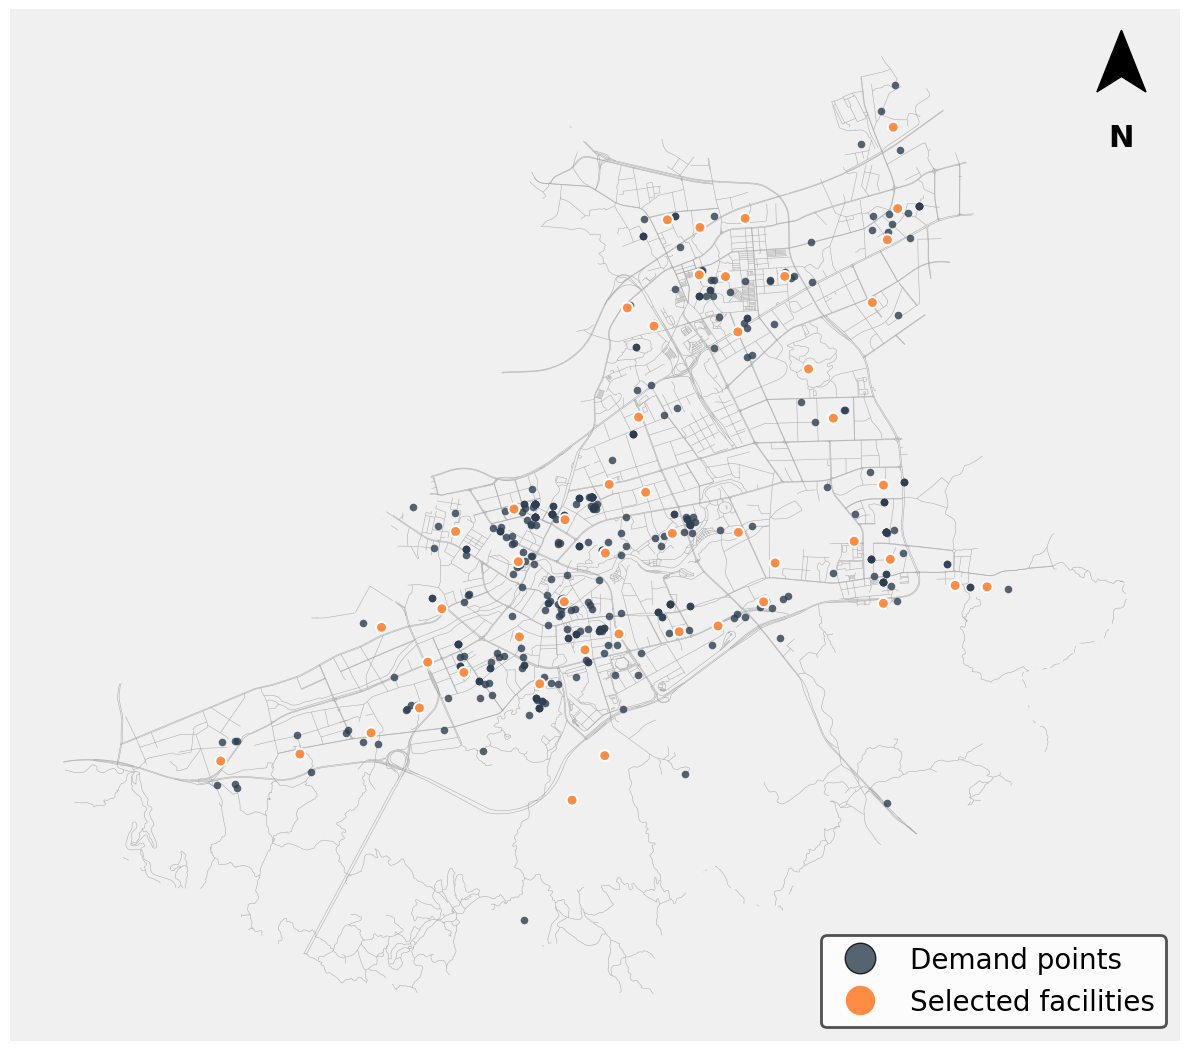

In [76]:
# Demo call for pretty plot (Gurobi)
#try:
#    opt_sites = cand_df.loc[selected_sites]
#except Exception:
#    opt_sites = cand_df.iloc[:30]
ls = poi[['lon','lat']].copy()

# 估计中心纬度用于换算（经纬度数据时）
approx_lat = float(ls['lat'].mean()) if 'lat' in ls.columns else float(ls['Y'].mean())

ax = plot_result_pretty(
    #ls_hlt,
    ls,
    center_points,
    radius_m=550,
    roads_path="D:\Academic\Task123_HiSpot\hispot-main\data\shenzhen\坪山区路网.shp",
    demand_gridsize=80,
    demand_cmap="inferno",
    roads_color="#9e9e9e", roads_alpha=0.8,
    overlay_points_size=30, overlay_points_alpha=0.8,
    norm_mode="log",
    vmin_q=0.12,
    vmax_q=0.995,
    reduce="sum",
    circle_style="ring",
    show_heat=False,
    #show_heat=True,
    lang="en",
    title="MCLP-Optimized Facilities"
)
# 16:9 canvas (for PPT) and save HD image
fig = ax.figure
fig.set_size_inches(20, 11.25)
fig.tight_layout()
ax.set_title('')
for s in ax.spines.values(): s.set_visible(False)
ax.set_xticks([]); ax.set_yticks([])
ax.set_facecolor("#F0F0F0")      # 改坐标区底色
#ax.figure.patch.set_facecolor("#696969")  # 可选：改整张图画布底色
fig.savefig("MCLP-pingshan.png", dpi=300, bbox_inches="tight")
plt.show()



In [77]:
# 在含三张图片的目录或 Notebooks 目录运行
# 倒立“品”字形：上排两张（左 MCLP，右 BCLP），下排一张（LSCP 居中）
# 每张图片下方标注：(a) (b) (c)；不缩放原图，300 DPI 保存

from pathlib import Path

try:
    from PIL import Image, ImageDraw, ImageFont
except ImportError:
    import sys, subprocess
    subprocess.check_call([sys.executable, "-m", "pip", "install", "pillow"])
    from PIL import Image, ImageDraw, ImageFont

# 1) 定位图片
name_map = {
    "MCLP": "MCLP-pingshan.png",
    "BCLP": "BCLP-pingshan.png",
    "LSCP": "LSCP-pingshan.png",
}
cwd = Path.cwd()
roots = [cwd, cwd / "Notebooks"]
paths = None
for root in roots:
    cand = {k: root / v for k, v in name_map.items()}
    if all(p.exists() for p in cand.values()):
        paths = cand
        break
if paths is None:
    missing = [str((roots[0] / v)) for v in name_map.values()]
    raise FileNotFoundError("找不到三张图片，请确认当前目录或 Notebooks 目录下存在：\n" + "\n".join(missing))

# 2) 打开图片（保留原始像素）
img_m = Image.open(paths["MCLP"]).convert("RGB")  # 左上
img_b = Image.open(paths["BCLP"]).convert("RGB")  # 右上
img_l = Image.open(paths["LSCP"]).convert("RGB")  # 下方

# 3) 版式参数
outer_margin = 40         # 画布四周边距
h_gap = 40                # 上排两图的水平间距
v_gap = 50                # 上排与下排的垂直间距
bg_color = (255, 255, 255)
text_color = (0, 0, 0)

# 4) 字体与标注
def load_font(font_size: int) -> ImageFont.FreeTypeFont | ImageFont.ImageFont:
    candidates = [
        r"C:\Windows\Fonts\msyh.ttc",
        r"C:\Windows\Fonts\SimHei.ttf",
        r"C:\Windows\Fonts\simsun.ttc",
        r"C:\Windows\Fonts\arial.ttf",
    ]
    for fp in candidates:
        if Path(fp).exists():
            try:
                return ImageFont.truetype(fp, font_size)
            except Exception:
                pass
    return ImageFont.load_default()

base_width = min(img_m.width, img_b.width, img_l.width)
font_size = max(24, min(72, int(round(base_width * 0.05))))
font = load_font(font_size)
label_margin_top = max(10, int(round(font_size * 0.4)))

# 使用 ASCII 括号以保证兼容性
labels = {
    "MCLP": "(a) MCLP",
    "BCLP": "(b) BCLP",
    "LSCP": "(c) LSCP",
}

# 5) 计算画布尺寸（倒立“品”）
top_row_width = img_m.width + h_gap + img_b.width
inner_width = max(top_row_width, img_l.width)
top_row_height = max(img_b.height, img_m.height)

# 行高 = 图片最大高 + 文本行高（用 font_size 近似）
inner_height = (
    top_row_height + label_margin_top + font_size +  # 上排图与其标注
    v_gap +
    img_l.height + label_margin_top + font_size      # 下排图与其标注
)
canvas_w = inner_width + 2 * outer_margin
canvas_h = inner_height + 2 * outer_margin
canvas = Image.new("RGB", (canvas_w, canvas_h), bg_color)
draw = ImageDraw.Draw(canvas)

# 6) 上排摆放（左：MCLP，右：BCLP），整体水平居中
top_y = outer_margin
top_x_left = outer_margin + (inner_width - top_row_width) // 2
top_x_right = top_x_left + img_m.width + h_gap
canvas.paste(img_m, (top_x_left, top_y))
canvas.paste(img_b, (top_x_right, top_y))

# 上排标注统一基线
top_label_y = top_y + top_row_height + label_margin_top
for (img, x), key in [((img_m, top_x_left), "MCLP"), ((img_b, top_x_right), "BCLP")]:
    text = labels[key]
    tb = draw.textbbox((0, 0), text, font=font)
    tw = tb[2] - tb[0]
    tx = x + (img.width - tw) // 2
    draw.text((tx, top_label_y), text, fill=text_color, font=font)

# 7) 下排摆放（LSCP 居中）
bottom_y = top_label_y + font_size + v_gap
bottom_x = outer_margin + (inner_width - img_l.width) // 2
canvas.paste(img_l, (bottom_x, bottom_y))

# 下排标注
bottom_label_y = bottom_y + img_l.height + label_margin_top
text = labels["LSCP"]
tb = draw.textbbox((0, 0), text, font=font)
tw = tb[2] - tb[0]
tx = bottom_x + (img_l.width - tw) // 2
draw.text((tx, bottom_label_y), text, fill=text_color, font=font)

# 8) 保存
out_path = cwd / "combined_pingshan_pin_inverted.png"
canvas.save(out_path, dpi=(300, 300))
print(f"已生成：{out_path.resolve()}  尺寸：{canvas_w}x{canvas_h}px，DPI: 300")

已生成：D:\Academic\Task123_HiSpot\hispot-main\Notebooks\combined_pingshan_pin_inverted.png  尺寸：7258x6640px，DPI: 300
